<a href="https://colab.research.google.com/github/jungbok/CNN_Image_Colorization/blob/master/lab6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNNs for Image Colorization
JungBok Lee
6896785721


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

a) Download the CIFAR-10 dataset

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)
images before normalization: 


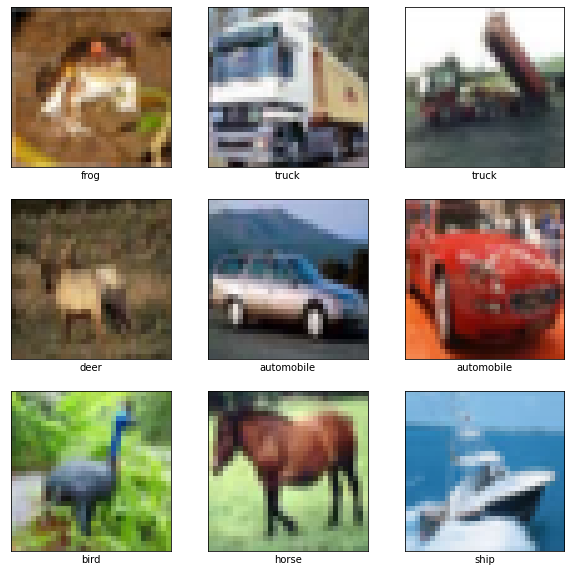

images after normalization: 


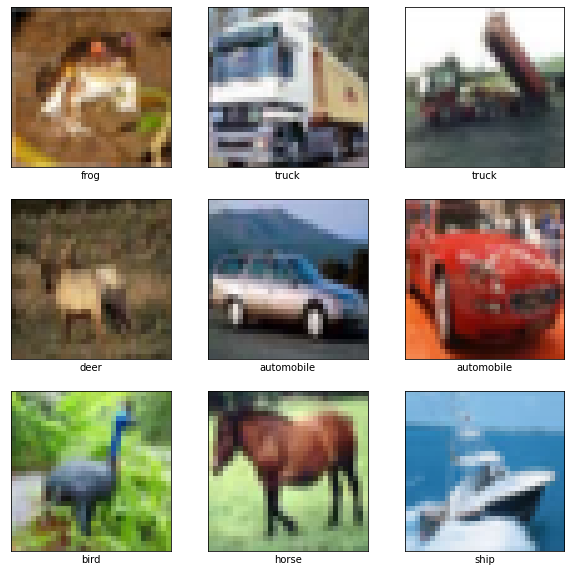

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1 - Necessary?
# train_images, test_images = train_images / 255.0, test_images / 255.0

# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# Normalized images
nol_train_images, nol_test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# plot 9 images function
def plot9Images(images, labels):
  plt.figure(figsize=(10,10))
  for i in range(9):
      plt.subplot(3,3,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.binary)
      # The CIFAR labels happen to be arrays, 
      # which is why you need the extra index
      plt.xlabel(class_names[labels[i][0]])
  plt.show()

print("images before normalization: ")
plot9Images(train_images, train_labels)
print("images after normalization: ")
plot9Images(nol_train_images, train_labels)

b) From the train and test dataset, extract the class birds

Train Index Shape for the class Bird: (50000,)
Test Index Shape for the class Bird: (10000,)
Train dataset labelled as bird


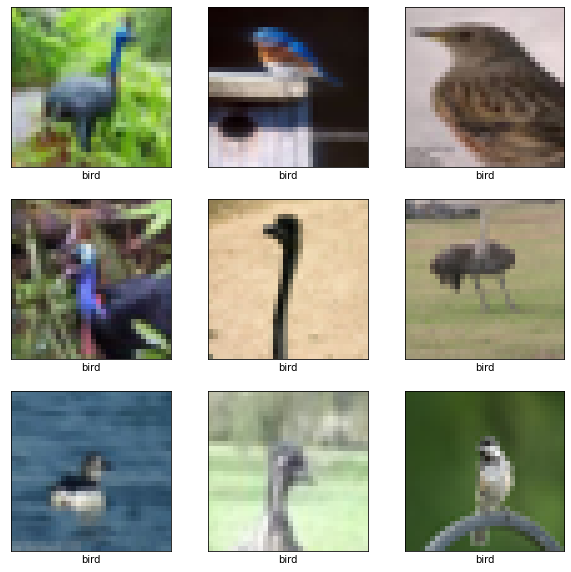

Test dataset labelled as bird


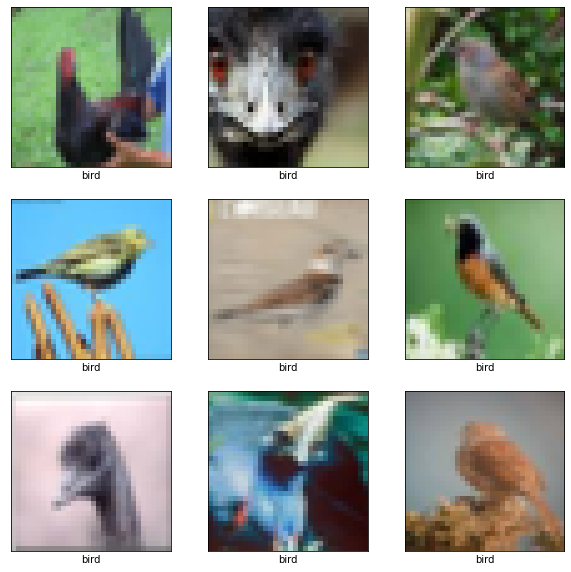

In [ ]:
# currently using normalized data
idx = (train_labels == 2).reshape(train_images.shape[0])
print('Train Index Shape for the class Bird: {}'.format(idx.shape))
bird_train_images = nol_train_images[idx]
bird_train_labels = train_labels[idx]

t_idx = (test_labels == 2).reshape(test_images.shape[0])
print('Test Index Shape for the class Bird: {}'.format(t_idx.shape))
bird_test_images = nol_test_images[t_idx]
bird_test_labels = test_labels[t_idx]

print("Train dataset labelled as bird")
plot9Images(bird_train_images, bird_train_labels)
print("Test dataset labelled as bird")
plot9Images(bird_test_images, bird_test_labels)

c) Images have 6000 X 32 X 32 pixels: choose at least 10% of the pixels randomly. P = 614400 and P = 6144000 pixels

In [ ]:
row = np.random.randint(32, size=None)
col = np.random.randint(32)
image = np.random.randint(6000)


randPix = np.random.randint(1, [32, 32, 600], size=(6144000,1,3))
print(randPix.shape)
print(randPix[:10])

bird_images = np.concatenate([bird_train_images, bird_test_images])
print("bird_images(train, test combined) shape: ", bird_images.shape)

rsbirds = bird_images[randPix[:,0,2], randPix[:,0,1], randPix[:,0,0], :]

print("RGB of pixel chosen")
print(rsbirds[:3, :])

(6144000, 1, 3)
[[[ 19  20 566]]

 [[ 24   6 509]]

 [[  7  28 178]]

 [[ 21  22 394]]

 [[ 30  24 218]]

 [[ 16   8 248]]

 [[ 15  29 287]]

 [[ 21  13 335]]

 [[ 31  16  13]]

 [[  9   5 114]]]
bird_images(train, test combined) shape:  (6000, 32, 32, 3)
RGB of pixel chosen
[[0.24705882 0.2627451  0.41960784]
 [0.60784314 0.65490196 0.65490196]
 [0.41960784 0.43921569 0.50588235]]


d) Run k-means clustering on the P vectors using K = 4